## Milestone 03 - Capstone - Final Project
### Author: Ana Javed

#### Workplace Scenario


The capstone project focuses on diaper manufacturing quality. In the Lesson 01 assignment, you discovered how the diaper manufacturing process works. Generally, to ensure or predict quality, a diaper manufacturer need s to monitor every step of the manufacturing process with sensors such as heat sensors, glue sensors, glue level, etc.

For this capstone project, we will use the SECOM (https://archive.ics.uci.edu/ml/machine-learning-databases/secom/) manufacturing Data Set from the UCI Machine Learning Repository. The set is originally for semiconductor manufacturing, but in our case, we will assume that it is for the diaper manufacturing process.

The dataset consists of two files:

   - a dataset file SECOM containing 1567 examples, each with 591 features, presented in a 1567 x 591 matrix
   - a labels file listing the classifications and date time stamp for each example

Reference

Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.



### Instructions

Create a new notebook and perform each of the following tasks and answer the related questions:

   1. Build a simple neural networks model
   2. Build a DNN model
   3. Build a RNN model
   4. Summarize your findings with examples.  Explain what the manufacturer should focus on to optimize the diaper manufacturing process.
   5. Solicit specific feedback on your code (instructions below).

Instructions to Solicit Feedback

Write 2-3 questions soliciting feedback on specific aspects on the assignment. For example, if you did something one way but are unsure if there might be a different or better way to do it, ask for feedback on that part. You may submit these questions by commenting out in the code within your .ipynb file or by typing them below your file name in the Your Response box on the Submit Milestone Assignment page. While the questions you submit will have no bearing on your grade, by doing so, you will engage more actively with the assignment and we will also be able to give you pointed feedback.

##### Reading and Merging Data

In [324]:
## Importing Necessary Libraries & Packages 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import datetime as dt
import csv
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Declaring inline visualizations 
%matplotlib inline


In [325]:
## Reading data file into Dataframe 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"
labels_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"

col_name_list = []
## Renaming Columns to different Sensor #'s
for i in range (1, 591, 1):
    col_name_list.append("sensor" + str(i))

# print (col_name_list)
    
df = pd.read_csv(url, sep=" ", header=None , names = col_name_list)
df_labels = pd.read_csv(labels_url, sep=" ", header = None, names = ["class", "timestamp"])


## First 5 Rows from Dataframes
print(df.head())
print(df_labels.head()) 


   sensor1  sensor2    sensor3    sensor4  sensor5  sensor6   sensor7  \
0  3030.93  2564.00  2187.7333  1411.1265   1.3602    100.0   97.6133   
1  3095.78  2465.14  2230.4222  1463.6606   0.8294    100.0  102.3433   
2  2932.61  2559.94  2186.4111  1698.0172   1.5102    100.0   95.4878   
3  2988.72  2479.90  2199.0333   909.7926   1.3204    100.0  104.2367   
4  3032.24  2502.87  2233.3667  1326.5200   1.5334    100.0  100.3967   

   sensor8  sensor9  sensor10  ...  sensor581  sensor582  sensor583  \
0   0.1242   1.5005    0.0162  ...        NaN        NaN     0.5005   
1   0.1247   1.4966   -0.0005  ...     0.0060   208.2045     0.5019   
2   0.1241   1.4436    0.0041  ...     0.0148    82.8602     0.4958   
3   0.1217   1.4882   -0.0124  ...     0.0044    73.8432     0.4990   
4   0.1235   1.5031   -0.0031  ...        NaN        NaN     0.4800   

   sensor584  sensor585  sensor586  sensor587  sensor588  sensor589  sensor590  
0     0.0118     0.0035     2.3630        NaN        

In [326]:
## Conducting Exploratory Data Analysis: 

print(df.shape)  # (1567, 592)
print(df.dtypes) 
print(df.describe()) 

print(df_labels.shape)  # (1567, 2)

df.head()

(1567, 590)
sensor1      float64
sensor2      float64
sensor3      float64
sensor4      float64
sensor5      float64
              ...   
sensor586    float64
sensor587    float64
sensor588    float64
sensor589    float64
sensor590    float64
Length: 590, dtype: object
           sensor1      sensor2      sensor3      sensor4      sensor5  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

       sensor6      sensor7      sensor8      sensor9     senso

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,...,sensor581,sensor582,sensor583,sensor584,sensor585,sensor586,sensor587,sensor588,sensor589,sensor590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


##### Clean and prepare data

In [327]:
## Function to Find & Replace Missing values

def replace_missing_values(df):
    for each in df.columns:
        if df.loc[:, each].dtype in ('float64', 'int64'):
            df.loc[:, each] = pd.to_numeric(df.loc[:, each], errors='coerce')
            HasNan1 = np.isnan(df.loc[:, each] )
            # print("Number of missing values removed in " + each + " column:", sum(HasNan1)) 
            df.loc[HasNan1, each] = np.nanmedian(df.loc[:, each] )




In [328]:
## Missing Value Counts by Columns: 
replace_missing_values(df)

## Merging the two Datasets into df 
df['class'] = df_labels['class']
df['timestamp'] = df_labels['timestamp']


In [329]:
## Adding separate date and time columns 
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date_column'] = pd.to_datetime(df['timestamp']).dt.date
df['time_column'] = pd.to_datetime(df['timestamp']).dt.time

## Creating counts Column for visualizations 
df['counts'] = 1

## Adding Month Column and TimeOfDay Column
df['Month'] = pd.to_datetime(df['timestamp']).dt.month

### Categorizing Time of Day into 
### Morning", "Early Afternoon", "Later Afternoon", "Evening" Buckets
df.loc[:, "TimeOfDay"] = df.loc[:, "time_column"]
df.loc[df.loc[:, "time_column"] < pd.to_datetime('19:00:00').time() , "TimeOfDay"] = "Late Afternoon"
df.loc[df.loc[:, "time_column"] < pd.to_datetime('13:00:00').time()  , "TimeOfDay"] = "Early Afternoon"
df.loc[df.loc[:, "time_column"] < pd.to_datetime('07:00:00').time() , "TimeOfDay"] = "Morning"
df.loc[df.loc[:, "time_column"] >= pd.to_datetime('19:00:00').time() , "TimeOfDay"] = "Evening"


In [330]:
## Validating New Column Counts
# print("Category Counts: ")
# print(df.loc[:, "TimeOfDay"].value_counts())

# Verifying the Ranges for the Categories 
print("\nMorning: ")
print(min(df.loc[df.loc[:, "TimeOfDay"] =="Morning" , "time_column"]), " to ",
      max(df.loc[df.loc[:, "TimeOfDay"] =="Morning" , "time_column"]),
     )
print("\nEarly Afternoon: ")
print(min(df.loc[df.loc[:, "TimeOfDay"] =="Early Afternoon" , "time_column"]),  " to ",
      max(df.loc[df.loc[:, "TimeOfDay"] =="Early Afternoon" , "time_column"]),
     )
print("\nLate Afternoon: ")
print(min(df.loc[df.loc[:, "TimeOfDay"] =="Late Afternoon" , "time_column"]),  " to ",
      max(df.loc[df.loc[:, "TimeOfDay"] =="Late Afternoon" , "time_column"]),
     )
print("\nEvening: ")
print(min(df.loc[df.loc[:, "TimeOfDay"] =="Evening" , "time_column"]),  " to ",
      max(df.loc[df.loc[:, "TimeOfDay"] =="Evening" , "time_column"]),
     )


Morning: 
00:01:00  to  06:56:00

Early Afternoon: 
07:01:00  to  12:58:00

Late Afternoon: 
13:01:00  to  18:59:00

Evening: 
19:03:00  to  23:59:00


In [331]:
## Adjusting Class column to be 0 and 1, instead of -1, 1 

print("Before: ")
print(df.loc[:, "class"].unique(), "\n")

## For Loop to create a binary value in "ring_class" column
for each in df.loc[:, "class"].unique():
    if int(each) >= 0:
        df.loc[df.loc[:, "class"] == each, "class"] = 1
    elif int(each) < 0: 
        df.loc[df.loc[:, "class"] == each, "class"] = 0
    continue
        
        
print("After: ")
print(df.loc[:, "class"].unique())


Before: 
[-1  1] 

After: 
[0 1]


##### Visually explore data

Number of Values in Each Class: 
0    1463
1     104
Name: class, dtype: int64


(array([1463.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         104.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

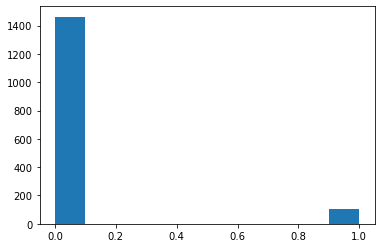

In [332]:
## Distribution of The Class Categories 
print("Number of Values in Each Class: ")
print(df.loc[:, "class"].value_counts())

plt.hist(df.loc[:, "class"])

2008-02-09    62
2008-08-29    50
2008-08-30    49
2008-06-10    48
2008-08-21    44
              ..
2008-08-13     1
2008-08-25     1
2008-02-08     1
2008-07-25     1
2008-07-20     1
Name: date_column, Length: 86, dtype: int64


Min Date:  2008-01-08 02:02:00
Max Date:  2008-12-10 18:47:00


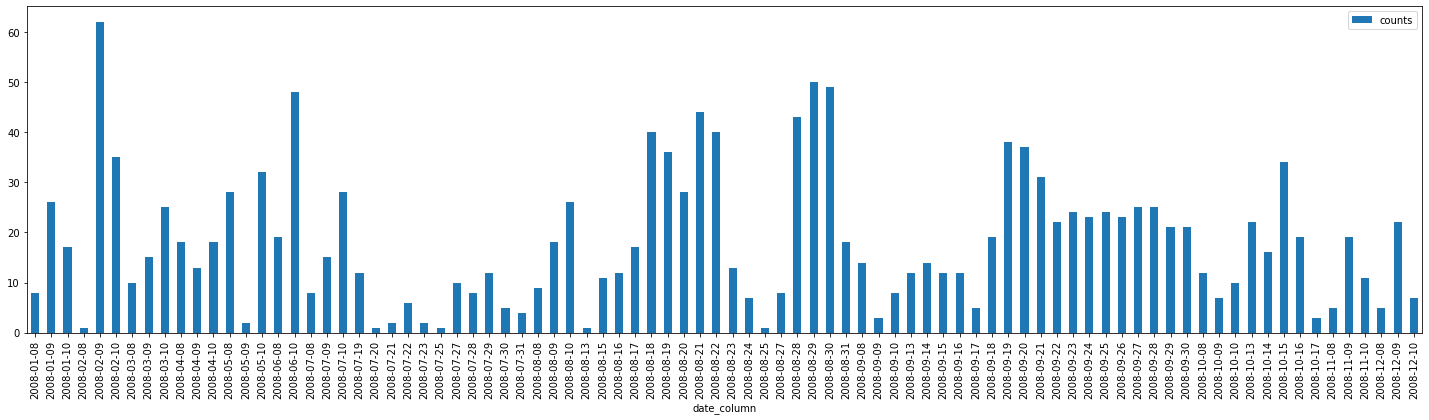

In [333]:
### Data Value Counts By Day 
## Bar Plot
fig = plt.figure(figsize=(25, 6)) # Define plot area
ax = fig.gca() # Define axis
df.loc[:, ['date_column', 'counts']].groupby(['date_column']).agg('count').sort_values('date_column').plot.bar(ax=ax)


# Printing Unique Counts of Each Day 
print(df.loc[:, "date_column"].value_counts().sort_values(axis = 0, ascending = False))
print('\n')
## Printing Min and Max Timestamp Values
print("Min Date: ", min(df.loc[:,'timestamp']))
print("Max Date: ", max(df.loc[:,'timestamp']))

Morning            438
Late Afternoon     405
Early Afternoon    380
Evening            344
Name: TimeOfDay, dtype: int64




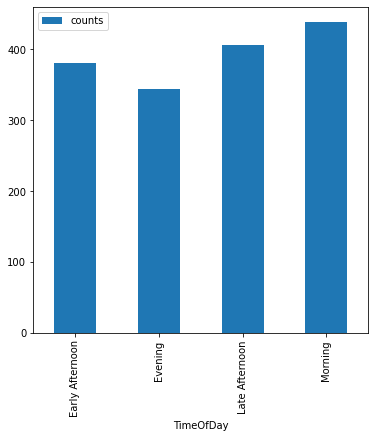

In [334]:
### Counts By Time of Day 
## Bar Plot
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis
df.loc[:, ['TimeOfDay', 'counts']].groupby(['TimeOfDay']).agg('count').sort_values('TimeOfDay').plot.bar(ax=ax)

# Printing Unique Counts of Each Day 
print(df.loc[:, "TimeOfDay"].value_counts().sort_values(axis = 0, ascending = False))
print('\n')


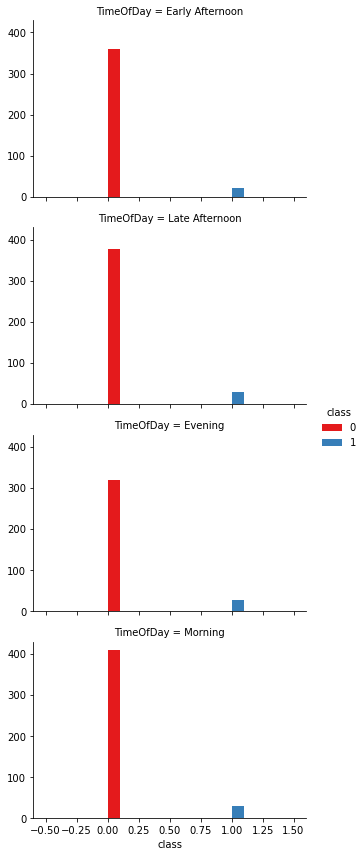

In [335]:
## Facet Plot: By Class 
import seaborn as sns
g = sns.FacetGrid(df,  
                  row='TimeOfDay', 
                  hue="class",
                  aspect = 1.5,
                  palette = "Set1"
                 )
g = g.map(plt.hist, "class").add_legend().tight_layout()
g

##### Handle class imbalance problem

In [336]:
## Making a copy of the dataframe
df2 = df.copy()

## Dropping columns that are not needed for the analysis 
df = df.drop(columns="timestamp")
df = df.drop(columns="date_column")
df = df.drop(columns="time_column")
df = df.drop(columns="TimeOfDay")
df = df.drop(columns="class")
df = df.drop(columns="counts")


In [337]:
print(df.shape)  #(1567, 591)

## Splitting Training and Testing Data
x_train, x_test, y_train, y_test = train_test_split (np.array(df),
                                                     np.array(df_labels.loc[:,"class"]),
                                                     test_size = 0.5,
                                                     random_state = 123)

(1567, 591)


In [338]:
## Feature Scaling with StandardScaler 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [339]:
## Loading SMOTE Package 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 111)

X_res, y_res = sm.fit_resample(x_train, y_train)


In [340]:
## Checking the Total Resampled Counts
uni, freq = np.unique(y_res, return_counts = True)  # 50% Class 0, #50% Class 1

print(len(y_res), uni, freq )  # New Counts per Class
print(X_res.shape)

    

1466 [-1  1] [733 733]
(1466, 591)


In [341]:
print(len(x_train), len(y_train))

print(len(X_res), len(y_res))


783 783
1466 1466


##### Apply feature selection techniques to reduce dimensionality of data

I will be applying the Lasso embed method to reduce the number of features in this dataset.

In [342]:
## Separating out the target variable
X = df
y = df_labels.loc[:, "class"]

## Applying LASSO Embedded Method 
from sklearn import linear_model

alpha = 0.025 # Increasing alpha can shrink variable coefficients more to 0
clf = linear_model.Lasso(alpha=alpha)
clf.fit(X, y)

# print(clf.coef_)
# print(clf.intercept_)


/Users/anajaved/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.417880241132082, tolerance: 0.038839055520102125
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.025)

In [343]:
for i, val in enumerate(clf.coef_):
    # print(i, val)
    if str(abs(val)) != '0.0':
        if df.columns[i] != 'class':
            print (df.columns[i], ".... Column:", i, "....", val)

sensor1 .... Column: 0 .... 2.696971434046566e-07
sensor2 .... Column: 1 .... -0.00016935344549287947
sensor3 .... Column: 2 .... -0.00021372446690069447
sensor4 .... Column: 3 .... -3.02427481132957e-05
sensor15 .... Column: 14 .... -0.0066472205392485335
sensor16 .... Column: 15 .... 0.0002417699711635772
sensor22 .... Column: 21 .... 4.004518430103049e-05
sensor23 .... Column: 22 .... -0.00011816323274499552
sensor24 .... Column: 23 .... -1.6675441035985818e-06
sensor25 .... Column: 24 .... -1.049747275424256e-06
sensor33 .... Column: 32 .... 0.00591533257725548
sensor34 .... Column: 33 .... 0.0006078297442631603
sensor36 .... Column: 35 .... -0.001380968743058162
sensor41 .... Column: 40 .... -0.0004906037297630629
sensor46 .... Column: 45 .... 0.0012816762167643966
sensor52 .... Column: 51 .... 9.793985994670073e-05
sensor56 .... Column: 55 .... -7.222621528792458e-05
sensor60 .... Column: 59 .... 0.01408553642903133
sensor61 .... Column: 60 .... 0.00384907359672806
sensor63 .... 

Initial findings:

This dataset shows serious class imbalance. Approximately 7% of the rows were of class "1" and the rest were "-1", which is why SMOTE was utilize to handle the imbalance. During data exploration, it was found that there were about even amounts of values for each of the "TimeOfDay" categories (Morning, Early Afternoon, Late Afternoon, and Evening). 

Lastly, the feature selection method applied to the dataset was the Embedded Method, specifically the LASSO method. A higher alpha value means a higher penalty for coefficients, and the more the coefficients will be closer to 0. With this information, I set the alpha = 0.025, and 19 of the original 591 attributes returned. They were:

    - sensor15 .... Column: 14 .... -0.006140397488435855
    - sensor22 .... Column: 21 .... 0.026310228829674553
    - sensor34 .... Column: 33 .... 0.007243928685268307
    - sensor60 .... Column: 59 .... 0.04550319677074833
    - sensor65 .... Column: 64 .... 0.020407806037949273
    - sensor76 .... Column: 75 .... 0.005114173133561314
    - sensor104 .... Column: 103 .... 0.01962183029918629
    - sensor115 .... Column: 114 .... 0.00865591331258631
    - sensor122 .... Column: 121 .... 0.014536747850965488
    - sensor130 .... Column: 129 .... 0.010400698849259718
    - sensor131 .... Column: 130 .... 0.002875723555295411
    - sensor282 .... Column: 281 .... -0.002810470537685449
    - sensor317 .... Column: 316 .... -0.001413139161257039
    - sensor349 .... Column: 348 .... 0.026488427956661325
    - sensor432 .... Column: 431 .... 0.004292709581914159
    - sensor438 .... Column: 437 .... 0.010047530783654396
    - sensor456 .... Column: 455 .... 0.002102233413598377
    - sensor485 .... Column: 484 .... -0.00025826101620221933
    - sensor511 .... Column: 510 .... 0.01037155426838045


It is difficult to make inferences about the sensor types, since there is little information of the different sensors - but it is going to be computationally easier for our models to work with 19 attributes now. 

###  1. Build a simple neural networks model

In [344]:
## Making additional copy in case it's needed for future models 
df3 = df2

## Only including features identified in feature selection process

for each in df2.columns:
    if each not in ['sensor15', 'sensor22','sensor34','sensor60','sensor65','sensor76','sensor104','sensor115',
             'sensor122','sensor130','sensor131','sensor282','sensor317','sensor349','sensor432','sensor438',
             'sensor456','sensor485','sensor511', 'timestamp', 'class']:
        df2 = df2.drop(columns=each)
        
        
df2.head()

,sensor15,sensor22,sensor34,sensor60,sensor65,sensor76,sensor104,sensor115,sensor122,sensor130,...,sensor282,sensor317,sensor349,sensor432,sensor438,sensor456,sensor485,sensor511,class,timestamp
0,7.9558,-5419.00,9.5126,-1.7264,21.7264,0.0126,-0.0042,0.0,15.88,-0.0473,...,0.0120,6.2698,0.0215,33.1562,3.1136,2.3106,494.6996,64.6707,0,2008-07-19 11:55:00
1,10.1548,-5441.50,9.7997,0.8073,19.1927,-0.0039,-0.0045,0.0,15.88,-0.0946,...,0.0154,5.6522,0.0142,2.2655,3.2153,2.2568,0.0000,141.4365,0,2008-07-19 12:32:00
2,9.5157,-5447.75,8.6590,23.8245,16.1755,-0.0078,-0.0026,0.0,15.90,-0.1892,...,0.0157,5.7247,0.0105,29.1663,3.1281,3.1182,0.0000,240.7767,1,2008-07-19 13:17:00
3,9.6052,-5468.25,8.6789,24.3791,15.6209,-0.0555,-0.0059,0.0,15.55,0.2838,...,0.0172,5.4440,0.0407,13.4051,2.7013,3.0744,305.7500,113.5593,0,2008-07-19 14:43:00
4,10.5661,-5476.25,8.7677,-12.2945,32.2945,-0.0534,-0.0045,0.0,15.75,-0.5677,...,0.0163,4.8956,0.0246,10.7390,6.2069,4.7756,461.8619,148.0663,0,2008-07-19 15:22:00


In [345]:
X = df2.loc[:, ['sensor15', 'sensor22','sensor34','sensor60','sensor65','sensor76','sensor104','sensor115',
             'sensor122','sensor130','sensor131','sensor282','sensor317','sensor349','sensor432','sensor438',
             'sensor456','sensor485','sensor511']]
y = df2.loc[:, 'class']


## Splitting Training and Testing Data
x_train, x_test, y_train, y_test = train_test_split (X,
                                                     y,
                                                     test_size = 0.15,
                                                     random_state = 123)

## Feature Scaling with StandardScaler 
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


## Loading SMOTE Package 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 111)

X_res, y_res = sm.fit_resample(x_train, y_train)



In [346]:
## Utilizing sklearn MLP (Multi-layer Perceptron) for this
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from random import seed
seed(123)

## Calling on MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=1000, random_state=123)

## Fitting MLPClassifier with Training Data 
mlp.fit(X_res, y_res)

## Making Predictions with MLPClassifier 
predictions = mlp.predict(x_test)

## Printing Out Accuracy of Quality Classification 
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[212   9]
 [ 10   5]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       221
           1       0.36      0.33      0.34        15

    accuracy                           0.92       236
   macro avg       0.66      0.65      0.65       236
weighted avg       0.92      0.92      0.92       236



###   2. Build a DNN model

In [347]:
import tensorflow as tf
from tensorflow import keras

seed(123)

model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu), # Input Layer
    keras.layers.Dense(120, activation=tf.nn.relu), # Hidden Layer
    keras.layers.Dense(10) # Output Layer 
])


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_res, y_res, epochs=8)


# test_loss, test_acc = model.evaluate(x_test, y_test)
# print('Test accuracy:', test_acc)


Epoch 1/8
78/78 [==============================] - 1s 2ms/step - loss: 3.3356 - accuracy: 0.4979
Epoch 2/8
78/78 [==============================] - 0s 3ms/step - loss: 0.7441 - accuracy: 0.6519
Epoch 3/8
78/78 [==============================] - 0s 5ms/step - loss: 0.7964 - accuracy: 0.6880
Epoch 4/8
78/78 [==============================] - 0s 4ms/step - loss: 0.6977 - accuracy: 0.6665: 0s - loss: 0.7243 - accura
Epoch 5/8
78/78 [==============================] - 0s 5ms/step - loss: 0.5631 - accuracy: 0.7039: 0s - loss: 0.5640 - accuracy: 0.
Epoch 6/8
78/78 [==============================] - ETA: 0s - loss: 0.5744 - accuracy: 0.75 - 0s 4ms/step - loss: 0.5760 - accuracy: 0.7516
Epoch 7/8
78/78 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7524
Epoch 8/8
78/78 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.7716


In [348]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

8/8 [==============================] - 0s 3ms/step - loss: 0.8470 - accuracy: 0.7203
Test accuracy: 0.7203390002250671


###   3. Build a RNN model

Generating new X and y variables since I am including timestamp column to the RNN model 

In [349]:
X = df2.loc[:, ['sensor15', 'sensor22','sensor34','sensor60','sensor65','sensor76','sensor104','sensor115',
             'sensor122','sensor130','sensor131','sensor282','sensor317','sensor349','sensor432','sensor438',
             'sensor456','sensor485','sensor511', 'timestamp']]
y = df2.loc[:, 'class']

## Making the timestamp the index in the dataset 
X.loc[:, "timestamp"] = pd.to_datetime(X.loc[:, "timestamp"])
X.index=pd.DatetimeIndex(data=X.loc[:, "timestamp"], freq = 'infer')
# print(X.head())

X = X.drop(columns="timestamp")


## Splitting Training and Testing Data
x_train, x_test, y_train, y_test = train_test_split (X,
                                                     y,
                                                     test_size = 0.15,
                                                     random_state = 123)


In [350]:
## Feature Scaling with StandardScaler 
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


## Ensuring the float type is enforced for the columns 
x_train = np.array(x_train, dtype=np.float)
x_test = np.array(x_test, dtype=np.float)
    

In [351]:
# print(len(x_test[0]),  # 236, 19
# len(x_train[0]),  # 1331, 19 
# len(X_res[0])) # 2484, 19 

In [352]:
## Construct our model 
x_train = x_train.reshape(-1, 1, 19)
x_test  = x_test.reshape(-1, 1, 19)
y_train = y_train.values.reshape(-1, 1, 1)
y_test = y_test.values.reshape(-1, 1, 1)


model3 = keras.models.Sequential()
model3.add(keras.layers.LSTM(100, input_shape=(1, 19), activation="relu"))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
print(model3.summary())

model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_53 (LSTM)               (None, 100)               48000     
_________________________________________________________________
dense_127 (Dense)            (None, 1)                 101       
Total params: 48,101
Trainable params: 48,101
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
42/42 [==============================] - 4s 31ms/step - loss: 0.2406 - accuracy: 0.6438 - val_loss: 0.1860 - val_accuracy: 0.9364
Epoch 2/5
42/42 [==============================] - 1s 15ms/step - loss: 0.1712 - accuracy: 0.9218 - val_loss: 0.1199 - val_accuracy: 0.9364
Epoch 3/5
42/42 [==============================] - 0s 8ms/step - loss: 0.1091 - accuracy: 0.9356 - val_loss: 0.0803 - val_accuracy: 0.9364
Epoch 4/5
42/42 [==============================] - 0s 6ms/step - loss: 0.0726 - accurac

In [353]:
# Evaluate model #3
scores = model3.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 93.64%


###   4. Summarize your findings with examples.  Explain what the manufacturer should focus on to optimize the diaper manufacturing process.

For the simple neural network, I used the MLPClassifier from sklearn. I did not include the timestamp column, and I limited the columns to the features identified by the LASSO embed method. There were 3 hidden layers, each with 30 nodes, and 100 iterations. This method provided an overall accuracy score of 92%. Even though the class imbalance was addressed with the SMOTE method, the F1-score for the binary classes differentiate (96% for class 0, 34% for class 1). The average F1-score was 65%. 

For the DNN model, there were 3 layers, 120 inputs in the hidden layer, the adam optimizer, loss was set to sparse categorical cross entropy, and there were 8 epochs. The last epoch accuracy was 77.16%, and the testing accuracy is 72.03%. Since the testing accuracy is lower by about 5%, there is a chance that the model has overfitted to the training data. 

Lastly, the RNN model was the only model to include the timestamp column. The activation function was set to sigmoid, the loss function was mse, the optimizer was adam, and there were 5 epochs specified. This model produced the highest accuracy out of all three models and it was 93.64%.

###   5. Solicit specific feedback on your code (instructions below).

1) How do you sucessfully standardize/normalize the data when you have timestamp column?

2) How do you successfully handle class imbalance with SMOTE method when you have a timestamp column?